In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data from the CSV file
file_path = "/Users/yeshwanthsatyadev/Downloads/my_movies.csv"  
df = pd.read_csv(file_path)

In [6]:
# Drop non-numeric columns
df = df.select_dtypes(include=['int'])


In [7]:
# Data preprocessing - convert the dataset into a transaction format
te = TransactionEncoder()
df_encoded = te.fit_transform(df)

In [8]:
# Convert the encoded transactions to a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=te.columns_)

In [9]:
# Try different values of support and confidence
support_values = [0.1, 0.2, 0.3, 0.4, 0.5]
confidence_values = [0.2, 0.3, 0.4, 0.5, 0.6]

In [10]:
for min_support in support_values:
    for min_confidence in confidence_values:
        frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
        print(f"Support: {min_support}, Confidence: {min_confidence}")
        print(f"Number of rules: {len(rules)}")
        print(rules)
        print()


Support: 0.1, Confidence: 0.2
Number of rules: 126670
       antecedents                  consequents  antecedent support  \
0              ( )                          (1)                 0.4   
1              (1)                          ( )                 0.2   
2              ( )                          (2)                 0.4   
3              (2)                          ( )                 0.2   
4              ( )                          (G)                 0.4   
...            ...                          ...                 ...   
126665         (a)  (t,  , H, r, P, o, e, y, 2)                 0.5   
126666         (o)  (t,  , H, r, P, a, e, y, 2)                 0.4   
126667         (e)  (t,  , H, r, P, a, o, y, 2)                 0.5   
126668         (y)  (t,  , H, r, P, a, o, e, 2)                 0.2   
126669         (2)  (t,  , H, r, P, a, o, e, y)                 0.2   

        consequent support  support  confidence  lift  leverage  conviction  \
0             

Support: 0.1, Confidence: 0.6
Number of rules: 77761
      antecedents               consequents  antecedent support  \
0             (H)                       ( )                 0.2   
1             (M)                       ( )                 0.1   
2             (P)                       ( )                 0.3   
3             (S)                       ( )                 0.1   
4             (e)                       ( )                 0.5   
...           ...                       ...                 ...   
77756      (2, P)  (t,  , e, H, a, o, r, y)                 0.1   
77757      (a, 2)  (t,  , e, H, P, o, r, y)                 0.1   
77758      (o, 2)  (t,  , e, H, P, a, r, y)                 0.1   
77759      (e, 2)  (t,  , H, P, a, o, r, y)                 0.1   
77760      (y, 2)  (t,  , e, H, P, a, o, r)                 0.1   

       consequent support  support  confidence      lift  leverage  \
0                     0.4      0.2    1.000000  2.500000      0.12   
1 

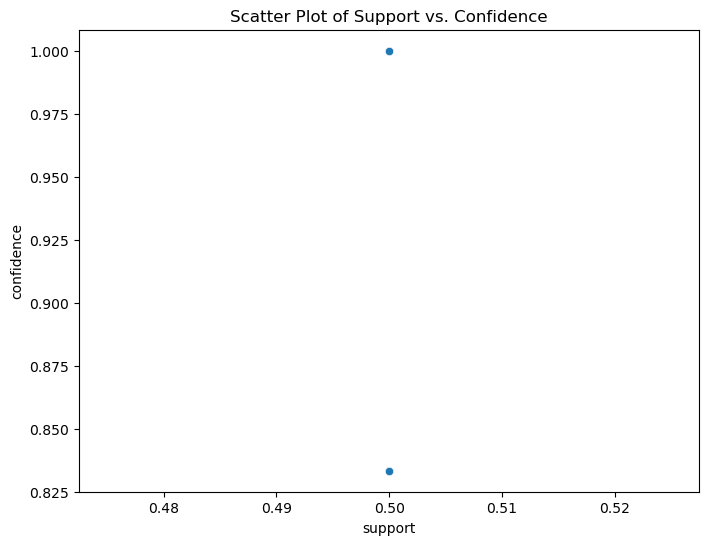

In [11]:
# Visualize the obtained rules using different plots
# Scatter plot of support vs. confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x="support", y="confidence", data=rules)
plt.title('Scatter Plot of Support vs. Confidence')
plt.show()